# 因子构建

|宏观风险    |  真实因子                 |  隐含因子                                                                            |
|--     |--             |--            |
|经济增长风险|   GDP 同比- 预期 GDP 同比 |   沪深300指数（10%），恒生中国企业指数（15%）、<br>住宅价格指数(25%)、CRB 工业原料指数(50%)   |
|利率风险    |  10年期国债收益率         |  中债-国债总财富指数(7-10 年)                                                          |
|通胀风险    |  0.3*PPI +0.7*CPI         |  原油(33%)、螺纹钢(34%)、猪肉(33%)                                                   |
|信用风险    |  AA 中票(3年)-国债(3年)   |  多：企业债AA(3-5年）总财富指数、<br>空：国债(3-5 年)总财富指数                              |


## 1. 读入因子成分资产原始数据

In [45]:
import os, sys, argparse, logging

# 设置logging格式和级别
logging.basicConfig(
    # level=logging.DEBUG,
    level=logging.INFO, 
    format='%(filename)s-line%(lineno)d %(levelname)s: %(message)s'
    )

logging.disable(logging.DEBUG)
logging.disable(logging.INFO)

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
from datetime import datetime
from copy import deepcopy

import warnings
warnings.filterwarnings('ignore')

logging.disable(logging.NOTSET)

framework_path = os.path.join(os.path.abspath(''), '../../../../国君研究所/工作/FOF_portfolio_toolbox/framework')
if framework_path not in sys.path:
    sys.path.append(framework_path)

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

In [46]:
raw_data_path = os.path.join(this_path, '../data/raw_data_from_guozhi')

file_1 = os.path.join(raw_data_path, 'factor_data1.xlsx')
data_1 = pd.read_excel(file_1, header=0)

# drop header and tail
data_1 = data_1.iloc[1:-2]

# cut date range
data_1.set_index('指标名称', inplace=True)
data_1 = data_1.loc['2005': '2022']

data_1.columns = [
    '恒生中国企业指数', 
    '原油', 
    '沪深300', 
    '猪肉_当月同比', 
    '工业原料指数', 
    '国债到期收益率', 
    '螺纹钢', 
    '猪肉_周环比',
    '住宅指数',
    '猪肉_平均批发价'  
]

data_1

,恒生中国企业指数,原油,沪深300,猪肉_当月同比,工业原料指数,国债到期收益率,螺纹钢,猪肉_周环比,住宅指数,猪肉_平均批发价
指标名称,,,,,,,,,,
2005-01-03,4763.47,42.12,NaN,NaN,322.38,NaN,NaN,NaN,NaN,NaN
2005-01-04,4697.75,43.91,982.794,NaN,319.22,5.2221,NaN,NaN,NaN,NaN
2005-01-05,4564.98,43.39,992.564,NaN,320.43,5.0084,NaN,NaN,NaN,NaN
2005-01-06,4538.77,45.56,983.174,NaN,318.08,5.1707,NaN,NaN,NaN,NaN
2005-01-07,4513.03,45.43,983.958,NaN,320.5,5.1533,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-18,5756.31,82.82,3838.2667,NaN,558.8,2.7002,3666,NaN,NaN,34.97
2022-10-19,5597.79,85.55,3776.5335,NaN,555.96,2.7052,3662,NaN,NaN,35.12
2022-10-20,5512.3,84.51,3754.9269,NaN,557.42,2.7175,3622,NaN,NaN,35.47


In [47]:
file_2 = os.path.join(raw_data_path, 'factor_data2.csv')
data_2 = pd.read_csv(file_2, index_col=0)
data_2.index = pd.to_datetime(data_2.index)

data_2

,CBA00651.CS,CBA04031.CS,CBA00631.CS
2005-01-04,97.7711,NaN,104.6127
2005-01-05,101.1029,NaN,105.3801
2005-01-06,96.8454,NaN,103.9313
2005-01-07,98.2687,NaN,103.6937
2005-01-10,98.5395,NaN,104.0194
...,...,...,...
2022-09-26,216.5491,261.8073,202.9701
2022-09-27,216.4853,261.7283,202.9239
2022-09-28,216.1451,261.6437,202.8520
2022-09-29,215.9363,261.6474,202.7287


In [48]:
data = pd.concat([data_1, data_2], axis=1)
data

,恒生中国企业指数,原油,沪深300,猪肉_当月同比,工业原料指数,国债到期收益率,螺纹钢,猪肉_周环比,住宅指数,猪肉_平均批发价,CBA00651.CS,CBA04031.CS,CBA00631.CS
2005-01-03,4763.47,42.12,NaN,NaN,322.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,4697.75,43.91,982.794,NaN,319.22,5.2221,NaN,NaN,NaN,NaN,97.7711,NaN,104.6127
2005-01-05,4564.98,43.39,992.564,NaN,320.43,5.0084,NaN,NaN,NaN,NaN,101.1029,NaN,105.3801
2005-01-06,4538.77,45.56,983.174,NaN,318.08,5.1707,NaN,NaN,NaN,NaN,96.8454,NaN,103.9313
2005-01-07,4513.03,45.43,983.958,NaN,320.5,5.1533,NaN,NaN,NaN,NaN,98.2687,NaN,103.6937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18,5756.31,82.82,3838.2667,NaN,558.8,2.7002,3666,NaN,NaN,34.97,NaN,NaN,NaN
2022-10-19,5597.79,85.55,3776.5335,NaN,555.96,2.7052,3662,NaN,NaN,35.12,NaN,NaN,NaN
2022-10-20,5512.3,84.51,3754.9269,NaN,557.42,2.7175,3622,NaN,NaN,35.47,NaN,NaN,NaN
2022-10-21,5517.44,85.05,3742.8929,NaN,557.7,2.7278,3634,NaN,NaN,35.67,NaN,NaN,NaN


In [49]:
file_3 = os.path.join(raw_data_path, '百城住宅价格指数.xlsx')
data_3 = pd.read_excel(file_3, header=0)

# drop header and tail
data_3 = data_3.iloc[:-2]

# cut date range
data_3.set_index('指标名称', inplace=True)

data_3 = data_3['百城住宅价格指数:环比']

data_3

指标名称
2010-06-30    0.75
2010-07-31   -0.67
2010-08-31   -0.46
2010-09-30    1.09
2010-10-31    0.95
              ... 
2022-06-30    0.04
2022-07-31   -0.01
2022-08-31   -0.01
2022-09-30   -0.02
2022-10-31   -0.01
Name: 百城住宅价格指数:环比, Length: 149, dtype: float64

## 2. 构建因子

In [50]:
date_range = [datetime(2010,12,31), datetime(2022,8,31)]
factor_path = os.path.join(this_path, '../data/factors')

In [51]:
# 环比数据变成实际数据
def com2Data(com, percentage=True):
    if percentage:
        com = 1+ (com / 100)
    com.iloc[0] = 1

    return com.cumprod()


In [52]:
# 插值算法，月度数据转日度数据
def interplotation(data, **kwargs):
    return pd.DataFrame(data).resample('D').interpolate(**kwargs)

In [53]:
def calculateFator(name, df, weights):
    df[df<0] = np.nan
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')

    df = df.rolling(22, min_periods=1).mean()

    daily_yield = df / df.shift()

    for key, weight in weights.items():
        daily_yield[key] *= weight

    factor_yield = daily_yield.sum(axis=1)

    if sum(weights.values()) == 0:
        factor_yield += 1

    factor_yield.iloc[0] = 1
    factor_data = pd.DataFrame(factor_yield.cumprod(), columns=[name])

    return factor_data

    

In [54]:
factors_df = pd.DataFrame()

### 2.1 经济增长风险

In [55]:
# 经济增长风险
df = data[['沪深300', '恒生中国企业指数', '工业原料指数']]

df = df.loc[date_range[0]: date_range[1]].fillna(method='ffill')


In [56]:
house_price = com2Data(data_3)
house_price = interplotation(house_price, kind='polynomial')
house_price.columns = ['百城住宅价格指数']


In [57]:
df['百城住宅价格指数'] = house_price.loc[date_range[0]: date_range[1]]

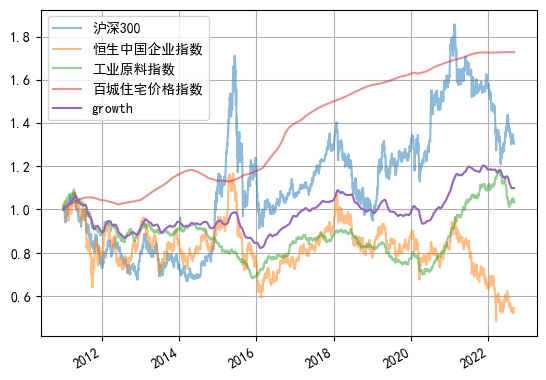

In [58]:
weights = {
    '沪深300': 0.1, 
    '恒生中国企业指数': 0.15, 
    '百城住宅价格指数': 0.25, 
    '工业原料指数': 0.5, 
}

factor_data = calculateFator('growth', df, weights)

# print(df)
ax = (df/df.iloc[0]).plot(alpha=0.5)
factor_data.plot(ax=ax, grid=True)


factors_df['growth'] = factor_data.iloc[:,0]
# factors_df.index = factor_data.index


### 2.2 利率风险

            CBA00651.CS
2010-12-31     134.1392
2011-01-03     134.1392
2011-01-04     134.3624
2011-01-05     134.8990
2011-01-06     134.8130
...                 ...
2022-08-25     216.8084
2022-08-26     216.7296
2022-08-29     216.9336
2022-08-30     217.1612
2022-08-31     217.0936

[3149 rows x 1 columns]


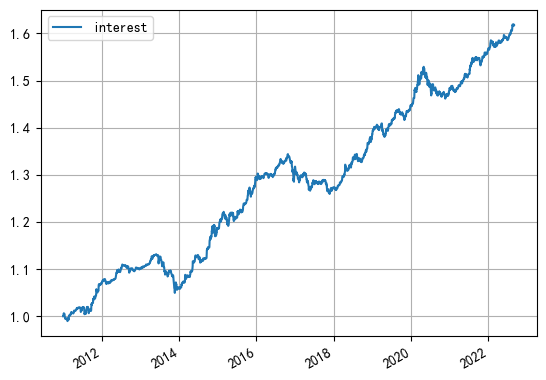

In [59]:
df = data[['CBA00651.CS']].loc[date_range[0]: date_range[1]].fillna(method='ffill')

print(df)

df /= df.iloc[0]
df.columns = ['interest']

df.plot(grid=True)

factors_df['interest'] = df.iloc[:,0]

### 2.3 通胀风险

In [60]:
df = data[['原油', '螺纹钢']]
df = df.loc[date_range[0]: date_range[1]]

pork_price = data['猪肉_周环比']
pork_price = pork_price.dropna()
pork_price = com2Data(pork_price).astype(float)
pork_price = interplotation(pork_price)

df['猪肉'] = pork_price


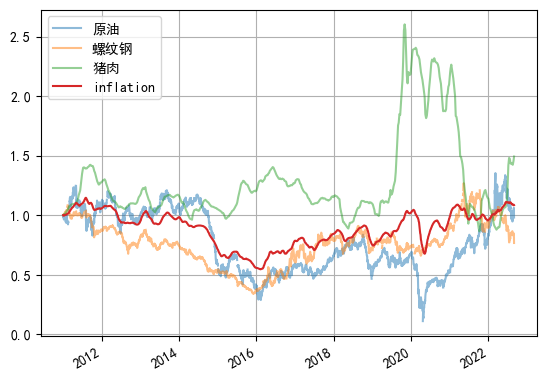

In [61]:
weights = {
    '原油': 0.33, 
    '螺纹钢': 0.34, 
    '猪肉': 0.33, 
}

factor_data = calculateFator('inflation', df, weights)

# print(df)
ax = (df/df.iloc[0]).plot(alpha=0.5)
factor_data.plot(ax=ax, grid=True)

factors_df['inflation'] = factor_data.iloc[:,0]

### 2.4 信用风险

In [62]:
df = data[['CBA04031.CS', 'CBA00631.CS']].loc[date_range[0]: date_range[1]]
df.columns = ['企业债', '国债']


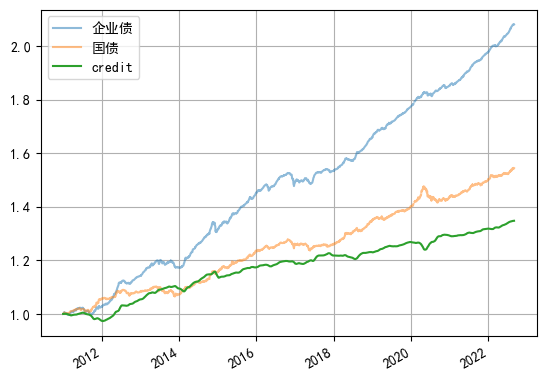

In [63]:
weights = {
    '企业债': 1, 
    '国债': -1,
}

factor_data = calculateFator('credit', df, weights)

# print(df)
ax = (df/df.iloc[0]).plot(alpha=0.5)
factor_data.plot(ax=ax, grid=True)

factors_df['credit'] = factor_data.iloc[:,0]

<AxesSubplot:>

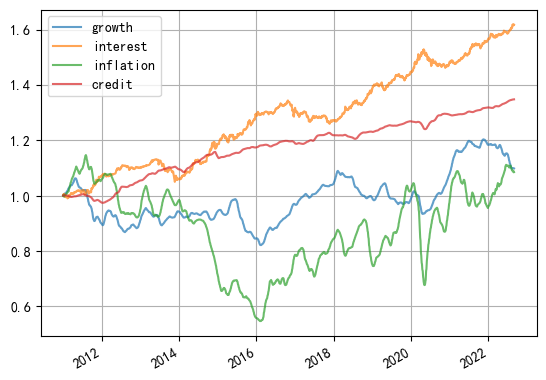

In [64]:
factors_df.plot(alpha=0.7, grid=True)

In [66]:
# 保存因子数据
factors_df.to_csv(os.path.join(factor_path, 'factors.csv'))